<a href="https://colab.research.google.com/github/sarahmagdi/DL/blob/main/DLAssignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10

In [11]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio



In [2]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [3]:
trainX.shape

(50000, 32, 32, 3)

In [4]:
trainy.shape

(50000, 1)

In [5]:
testX.shape

(10000, 32, 32, 3)

In [20]:
#labels
np.unique(trainy)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [21]:
'''
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
'''

'\n0: airplane\n1: automobile\n2: bird\n3: cat\n4: deer\n5: dog\n6: frog\n7: horse\n8: ship\n9: truck\n'

In [39]:
trainy[0][0]

6

In [48]:
airplane=[]
automobile=[]
bird=[]
cat=[]
deer=[]
dog=[]
frog=[]
horse=[]
ship=[]
truck=[]
for i in range(len(trainX)):
  if trainy[i][0]==0:
      airplane.append(trainX[i])
  if trainy[i][0]==1:
      automobile.append(trainX[i])
  if trainy[i][0]==2:
      bird.append(trainX[i])
  if trainy[i][0]==3:
      cat.append(trainX[i])
  if trainy[i][0]==4:
     deer.append(trainX[i])
  if trainy[i][0]==5:
    dog.append(trainX[i])
  if trainy[i][0]==6:
    frog.append(trainX[i])
  if trainy[i][0]==7:
    horse.append(trainX[i])
  if trainy[i][0]==8:
    ship.append(trainX[i])
  if trainy[i][0]==9:
    truck.append(trainX[i])


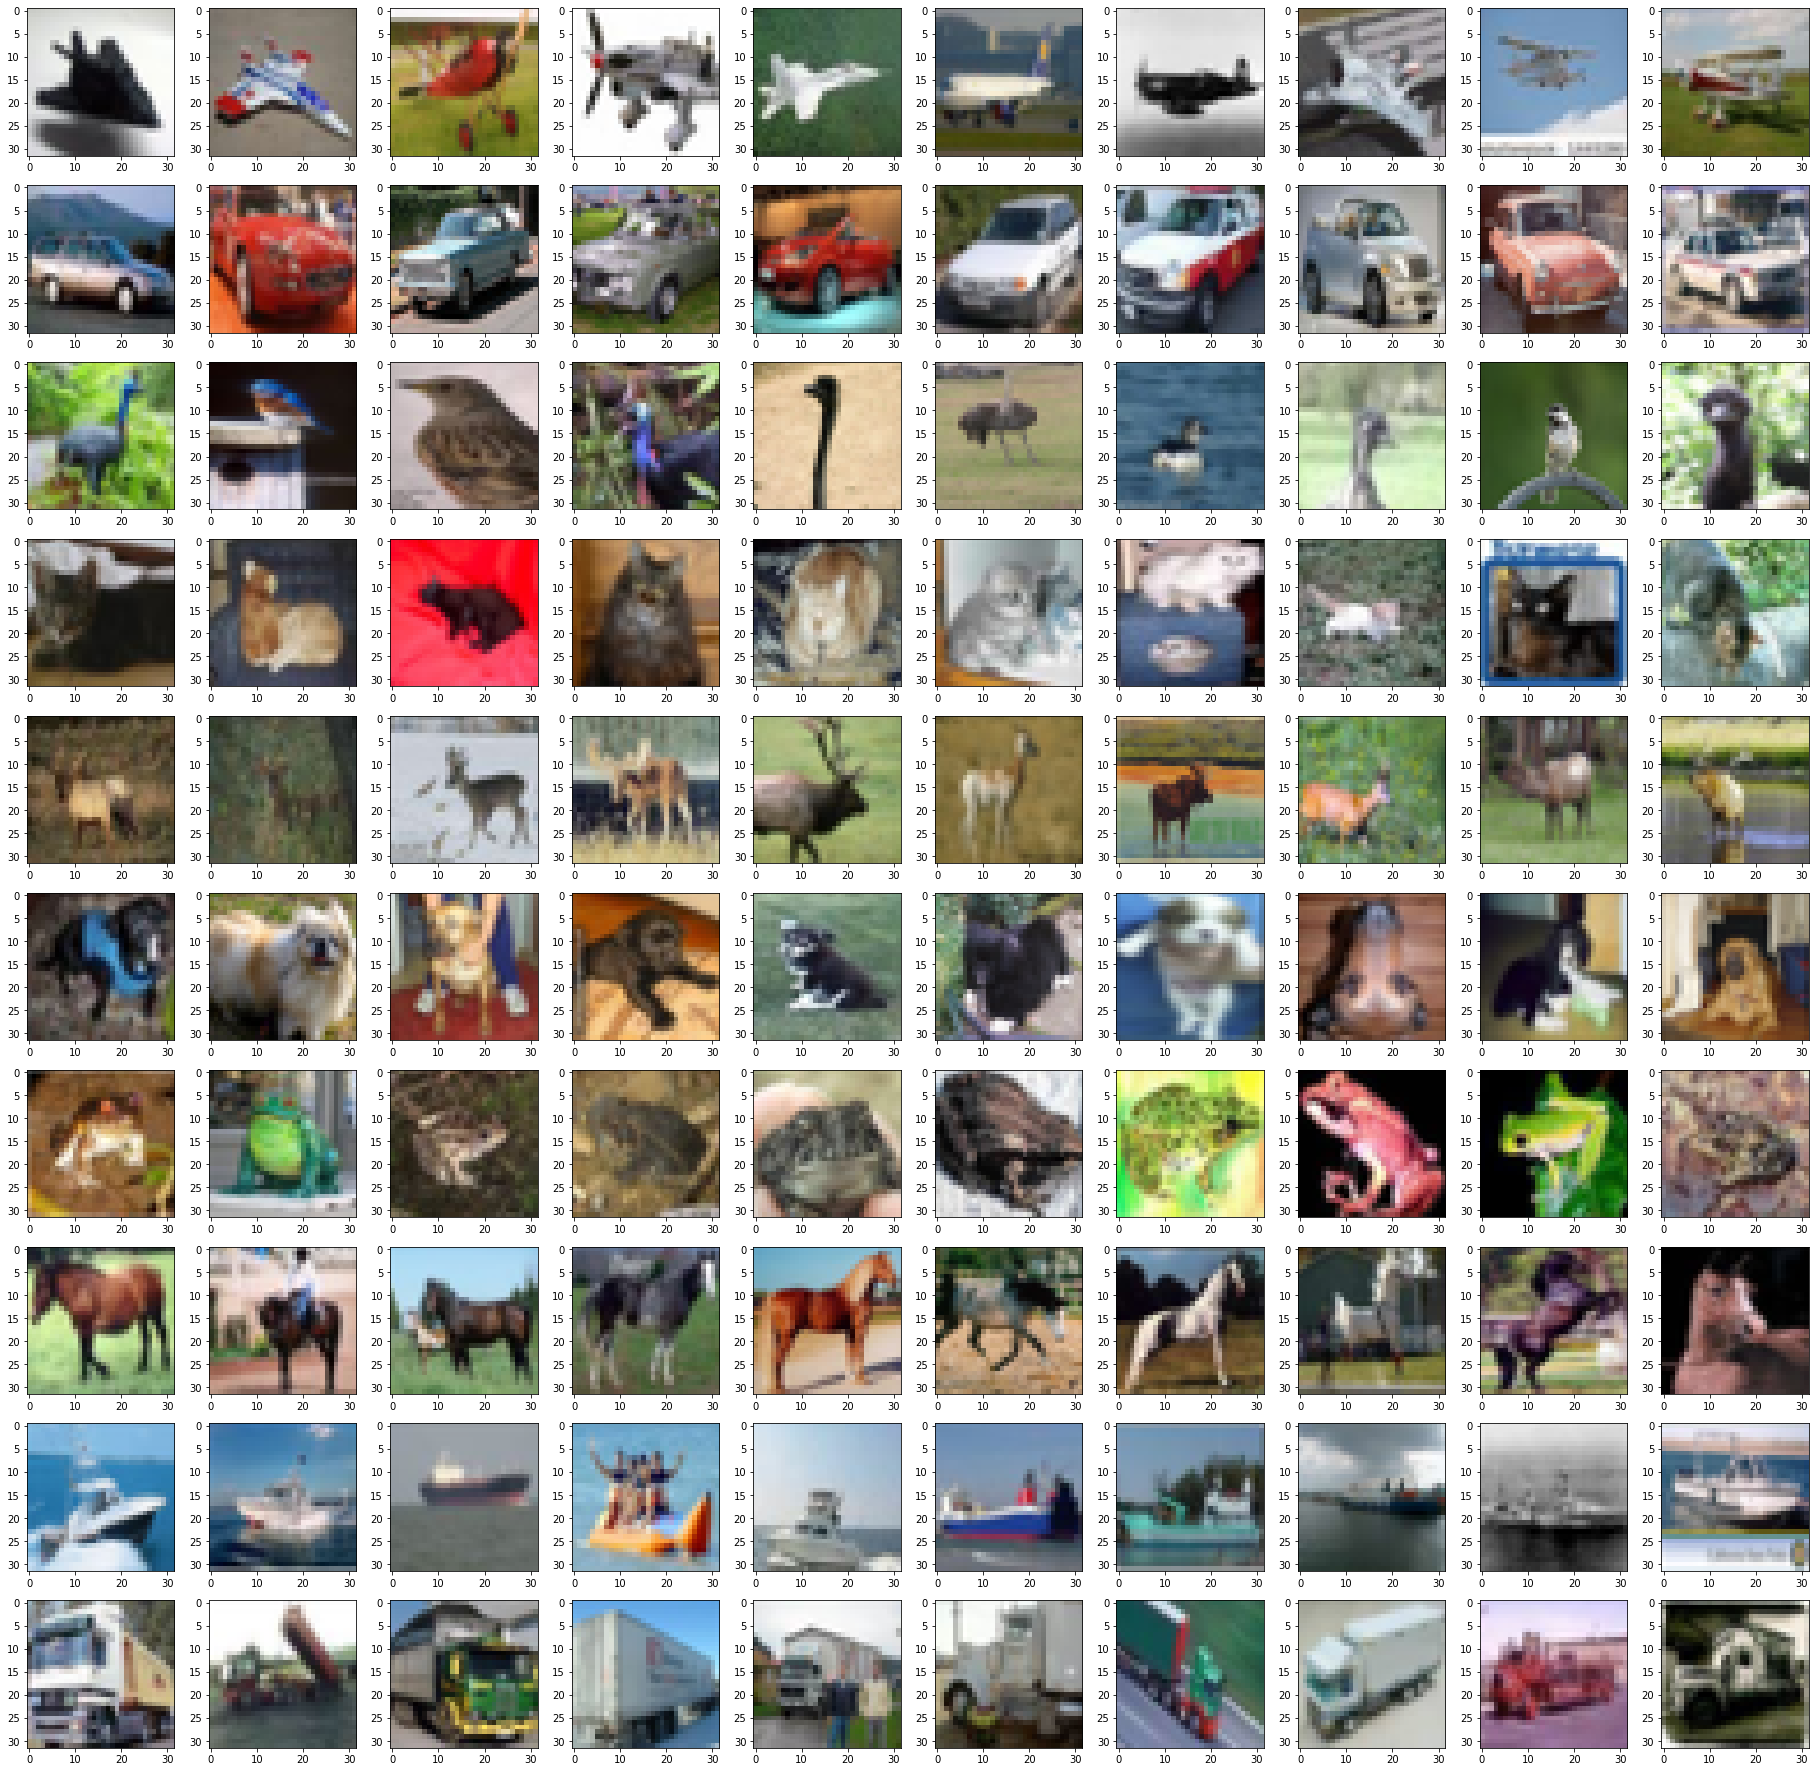

In [51]:

x0=0
x1=0
x2=0
x3=0
x4=0
x5=0
x6=0
x7=0
x8=0
x9=0
fig = plt.figure(figsize=(32, 32))
for i in range(100):
	# define subplot
      
      plt.subplot(10, 10, i+1)
      # plot raw pixel data
      if  i+1 >=1 and i+1 <=10:
         pyplot.imshow(airplane[x0])
         x0+=1
      if  i+1 >=11 and i+1 <=20:
         pyplot.imshow(automobile[x1])
         x1+=1
      if  i+1 >=21 and i+1 <=30:
         pyplot.imshow(bird[x2])
         x2+=1
      if  i+1 >=31 and i+1 <=40:
         pyplot.imshow(cat[x3])
         x3+=1
      if  i+1 >=41 and i+1 <=50:
         pyplot.imshow(deer[x4])
         x4+=1
      if  i+1 >=51 and i+1 <=60:
         pyplot.imshow(dog[x5])
         x5+=1
      if  i+1 >=61 and i+1 <=70:
         pyplot.imshow(frog[x6])
         x6+=1
      if  i+1 >=71 and i+1 <=80:
         pyplot.imshow(horse[x7])
         x7+=1
      if  i+1 >=81 and i+1 <=90:
         pyplot.imshow(ship[x8])
         x8+=1
      if  i+1 >=91 and i+1 <=100:
         pyplot.imshow(truck[x9])
         x9+=1
      

  
# show the figure
pyplot.show()

In [62]:
len(dog)

5000

In [63]:
len(cat)

5000

In [64]:
#data is balanced each class have same length

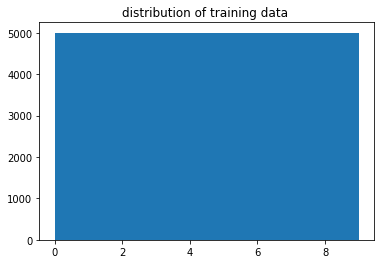

In [66]:
plt.title("distribution of training data ")
plt.hist(trainy)
plt.show() 

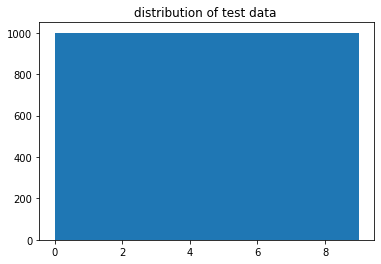

In [67]:
plt.title("distribution of test data ")
plt.hist(testy)
plt.show() 

In [70]:
# one hot encode for target values so we can use it in training when we calculate loss function
from tensorflow.keras.utils import to_categorical
trainy = to_categorical(trainy)
testy = to_categorical(testy)
	

In [71]:
trainy.shape

(50000, 10)

In [72]:
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX  / 255.0
testX = testX  / 255.0

In [141]:
#spliting data to tune hyperparameter
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split( trainX, trainy, test_size=0.02, random_state=42)

In [143]:
X_train.shape



(49000, 32, 32, 3)

In [97]:
testy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [151]:
X_train = X_train.reshape((49000, 32*32*3))
X_validation = X_validation.reshape((1000, 32 * 32*3))
testX = testX.reshape((10000, 32*32*3))


In [74]:
from keras import models
from keras import layers


In [158]:
from keras import regularizers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001), name='Layer_1', input_shape=(32 * 32*3,)))
network.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001) ,name='Layer_2'))
network.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001), name='Layer_3'))
network.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001),name='Layer_'))#to improve accuracy 
network.add(layers.Dense(10, activation='softmax'))


In [159]:
import keras
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
network.compile(optimizer=opt,
loss='categorical_crossentropy',
metrics=['accuracy'])

In [98]:
y_validation

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [125]:
y_train.shape

(45000, 10)

In [161]:
network.fit(X_train, y_train,epochs=70,batch_size=512,validation_data=(X_validation, y_validation))  
#validation_data=(X_validation, y_validation)

Epoch 1/70
96/96 [==============================] - 9s 94ms/step - loss: 1.8825 - accuracy: 0.4028 - val_loss: 1.8038 - val_accuracy: 0.4350
Epoch 2/70
96/96 [==============================] - 9s 92ms/step - loss: 1.8178 - accuracy: 0.4186 - val_loss: 1.7601 - val_accuracy: 0.4380
Epoch 3/70
96/96 [==============================] - 9s 93ms/step - loss: 1.7657 - accuracy: 0.4344 - val_loss: 1.7517 - val_accuracy: 0.4380
Epoch 4/70
96/96 [==============================] - 9s 92ms/step - loss: 1.7182 - accuracy: 0.4470 - val_loss: 1.7113 - val_accuracy: 0.4580
Epoch 5/70
96/96 [==============================] - 9s 92ms/step - loss: 1.6993 - accuracy: 0.4534 - val_loss: 1.7200 - val_accuracy: 0.4550
Epoch 6/70
96/96 [==============================] - 9s 91ms/step - loss: 1.6775 - accuracy: 0.4589 - val_loss: 1.6786 - val_accuracy: 0.4750
Epoch 7/70
96/96 [==============================] - 9s 91ms/step - loss: 1.6533 - accuracy: 0.4656 - val_loss: 1.6851 - val_accuracy: 0.4560
Epoch 8/70
96

In [162]:
test_loss, test_acc = network.evaluate(testX, testy)

313/313 [==============================] - 3s 9ms/step - loss: 1.5068 - accuracy: 0.5357


In [163]:
print('test accuracy :', test_acc)

test accuracy : 0.5357000231742859
